## **Preprocessing**

In [59]:
!pip install pandas seaborn matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [60]:
df = pd.read_csv("kc_house_data.csv")

In [61]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [62]:
df = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 8)]
df = df[(df['price'] > 10000) & (df['price'] < 2000000)]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21384 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21384 non-null  int64  
 1   date           21384 non-null  object 
 2   price          21384 non-null  float64
 3   bedrooms       21384 non-null  int64  
 4   bathrooms      21384 non-null  float64
 5   sqft_living    21384 non-null  int64  
 6   sqft_lot       21384 non-null  int64  
 7   floors         21384 non-null  float64
 8   waterfront     21384 non-null  int64  
 9   view           21384 non-null  int64  
 10  condition      21384 non-null  int64  
 11  grade          21384 non-null  int64  
 12  sqft_above     21384 non-null  int64  
 13  sqft_basement  21384 non-null  int64  
 14  yr_built       21384 non-null  int64  
 15  yr_renovated   21384 non-null  int64  
 16  zipcode        21384 non-null  int64  
 17  lat            21384 non-null  float64
 18  long       

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Performing EDA**

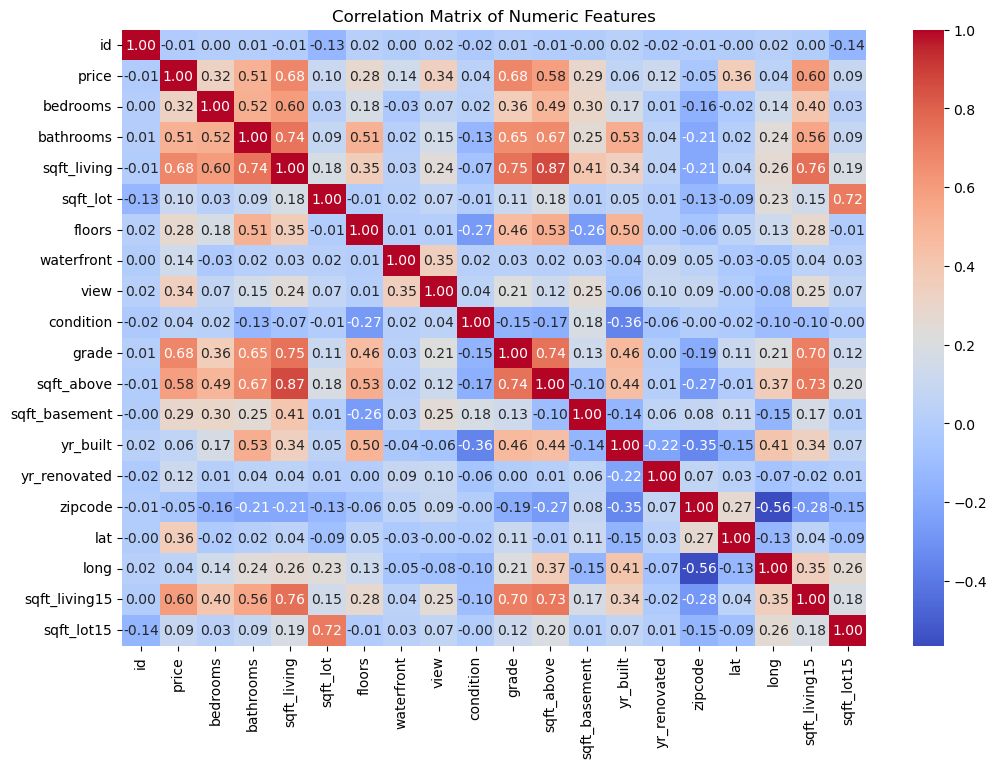

In [65]:
numeric_df = df.select_dtypes(include = ['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize = (12,8))
sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### 0.7+ = Strong
### 0.5–0.7 = Moderate
### 0.3–0.5 = Weak-to-moderate
### < 0.3 = Weak

## **Based on this HeatMap the following questions can be answered:**
### **1. Which variables are most strongly correlated with price?**
#### bedrooms - 0.31 - Having more bedrooms has a weak-to-moderate impact on price
#### bathrooms - 0.53 - Having more bathrooms has a moderate impact on price
#### sqft_living -0.70 - A larger living area tends to significantly increase the price
#### grade - 0.67 - Higher grade (quality of construction and design) is strongly associated with higher price.
#### sqft_above - 0.61 - Above-ground area also contributes positively to the price.
#### sqft_living_15 - Larger nearby houses (neighbors) tend to raise the price of a house.
#### view - A better view contributes to a higher price, but less than square footage or grade.

### **2. Which variables are weakly correlated with price?**
#### yr_built - 0.05 - Price is not strongly dependent on the construction year alone.
#### yr_renovated - 0.13 - Although it matters more than yr_built, overall it still does not impact price of house 
#### condition - 0.04 - Low correlation meaning that buyers care about other features more as compared to the condition of the house

### **3. Does bigger always mean more expensive?**
#### Since sqft_lot has a 0.09 correlation with price that indicates that a huge house does not increase price of a house by that much

### Printing the top 5 most frequent values in selected columns

Top 5 Zip Codes:
zipcode
98103    600
98038    589
98115    582
98052    573
98117    553
Name: count, dtype: int64


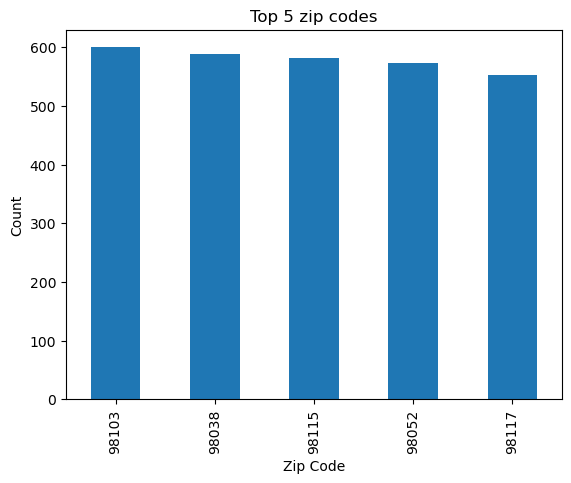


Top 5 Bedroom Counts:
bedrooms
3    9790
4    6790
2    2759
5    1542
6     260
Name: count, dtype: int64


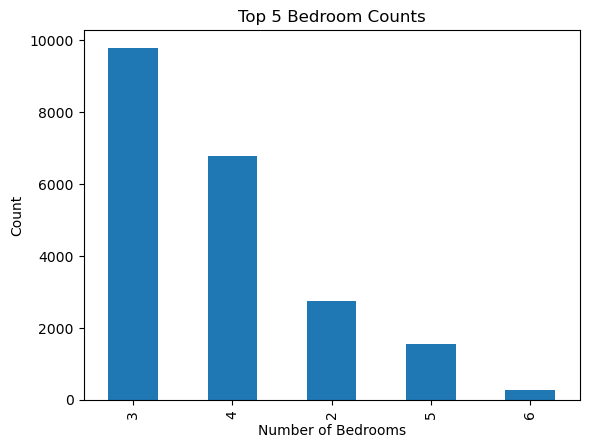


Top 5 House Conditions:
condition
3    13886
4     5629
5     1670
2      170
1       29
Name: count, dtype: int64


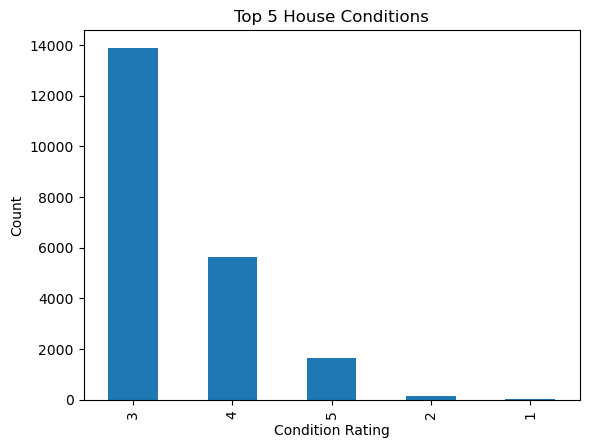

In [66]:
print("Top 5 Zip Codes:")
print(df['zipcode'].value_counts().head(5))
df['zipcode'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 zip codes")
plt.ylabel("Count")
plt.xlabel("Zip Code")
plt.show()

print("\nTop 5 Bedroom Counts:")
print(df['bedrooms'].value_counts().head(5))
df['bedrooms'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 Bedroom Counts")
plt.ylabel("Count")
plt.xlabel("Number of Bedrooms")
plt.show()

print("\nTop 5 House Conditions:")
print(df['condition'].value_counts().head(5))
df['condition'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 House Conditions")
plt.ylabel("Count")
plt.xlabel("Condition Rating")
plt.show()

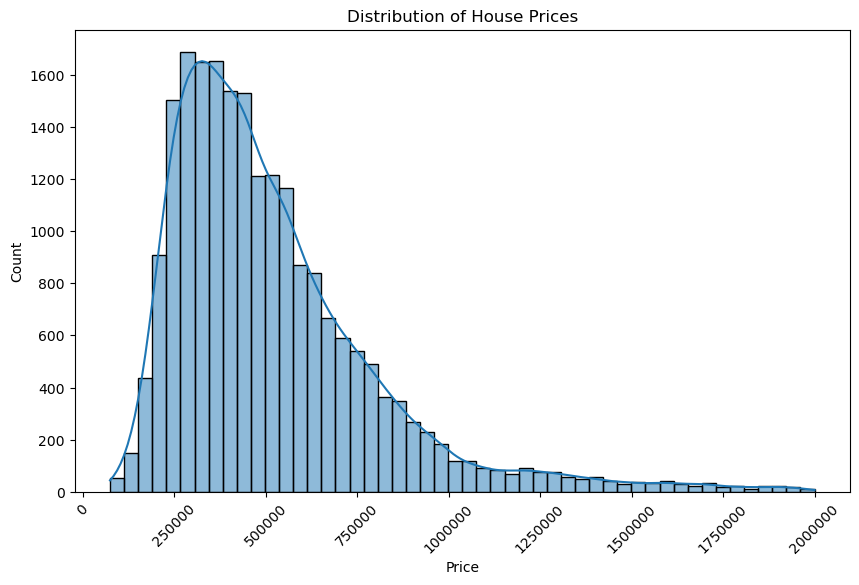

In [67]:
plt.figure(figsize=(10,6))
sb.histplot(df['price'], bins = 50, kde = True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.ticklabel_format(style='plain', axis='x')  
plt.xticks(rotation=45)  
plt.show()

#### **- The graph is right skewed meaning that the majority of houses are lower priced while few are expensive.**
#### **- The largest number of houses are between the price range of 200000 and 400000**
#### **- There are very few houses priced above $800,000, suggesting luxury homes are less common.**

In [68]:
print(df['bedrooms'].value_counts().sort_index())

bedrooms
1     199
2    2759
3    9790
4    6790
5    1542
6     260
7      33
8      11
Name: count, dtype: int64


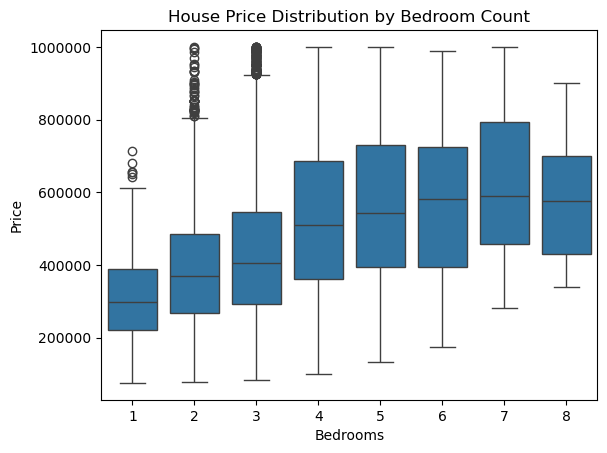

In [69]:
sb.boxplot(x='bedrooms', y='price', data=df[df['price'] < 1000000])
plt.title("House Price Distribution by Bedroom Count")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### **The highest-priced outliers are found in homes with 1–3 bedrooms, suggesting that luxury homes don’t necessarily have more bedrooms.**
### **An increase in the median also shows that more bedrooms → bigger houses → higher price.**

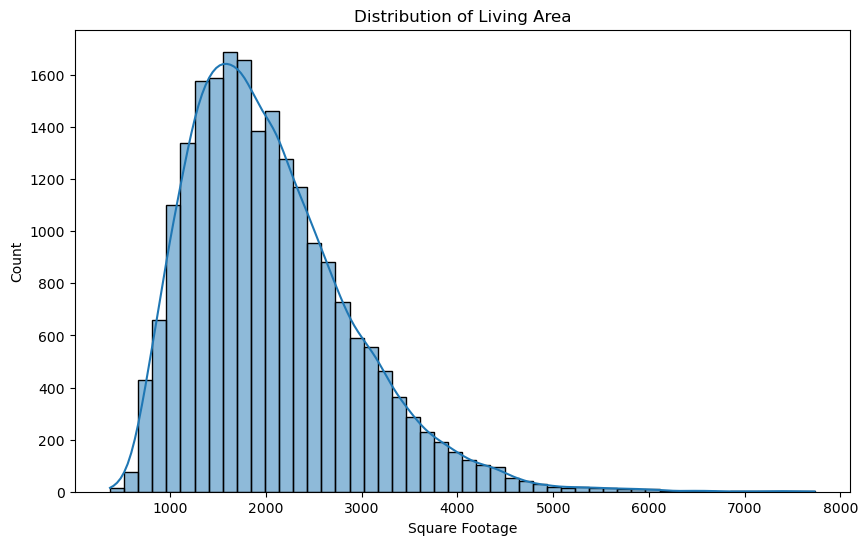

In [70]:
plt.figure(figsize=(10,6))
sb.histplot(df['sqft_living'], kde=True, bins=50)
plt.title("Distribution of Living Area")
plt.xlabel("Square Footage")
plt.ylabel("Count")
plt.show()

### **The majority of houses are sized between 1000 to 3000 sqft.**

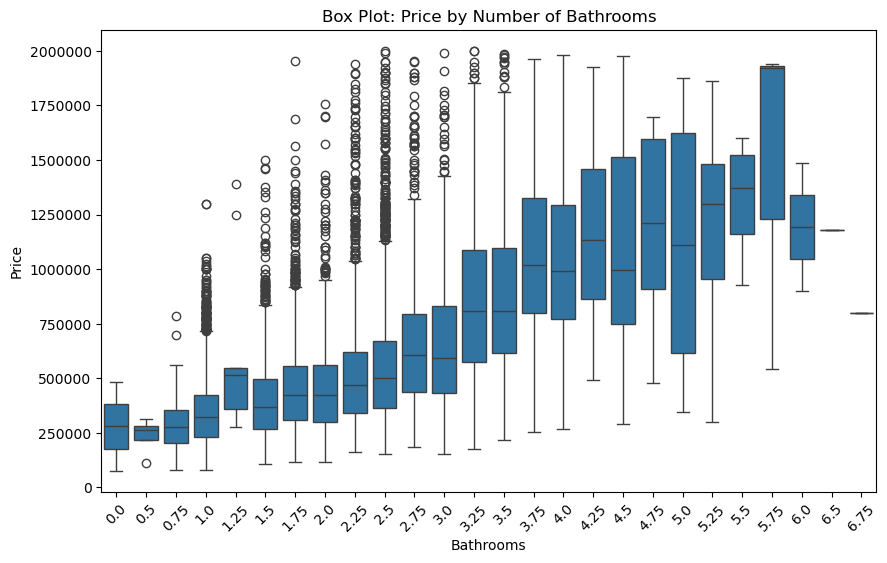

In [72]:
plt.figure(figsize=(10,6))
sb.boxplot(x='bathrooms', y='price', data=df)
plt.title("Box Plot: Price by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### **The majority of house prices, including outliers, fall within the 1.0 to 3.75 bathroom range. This indicates that:**
### High-priced homes are not limited to those with unusually high bathroom counts.
### Even houses with an average number of bathrooms may be priced significantly higher than others in the same group.
### This suggests that other features — such as location, square footage, condition, or lot size — are contributing more significantly to price variation than bathroom count alone.

## **In summary, the dataset shows skewed housing prices, with a majority of properties priced on the lower end but several high-value outliers. The most common property conditions are average or good, and features like living area and number of bedrooms show moderate correlation with price.**
## **The correlation heatmap revealed that sqft_living had the strongest correlation with price, while features like zipcode had little direct impact.**